In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [112]:
# coding=utf-8
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset
from torchvision import transforms, datasets, models


In [113]:
# data_transform = transforms.Compose([
#     transforms.Resize(84),
#     transforms.CenterCrop(84),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

In [114]:
batch_size=4
num_workers=2

In [115]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [116]:
# rainset_if = torchvision.datasets.CIFAR10(root='./kaggle/input/cifar10/cifar10', train=True,
#                                         download=True, transform=transform)

In [117]:
trainset = datasets.ImageFolder(root='/kaggle/input/cifar10/cifar10/train/', 
                                     transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True,
                                           num_workers=num_workers)

In [118]:
testset = datasets.ImageFolder(root='/kaggle/input/cifar10/cifar10/test/', 
                                     transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                           batch_size=batch_size, 
                                           shuffle=True,
                                           num_workers=num_workers)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [119]:
# 展示其中的一些训练图片。

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))#rgb  
    plt.show()


# get some random training images
dataiter = iter(trainloader)

In [120]:
images, labels = next(dataiter)
# images, labels = dataiter.next()
# 第一步 你需要改 num_workers=0
# 第二步 next(dataiter)

# 报错代码:x = data.next() 报错原因:python版本不同 解决方法:x = next(data)

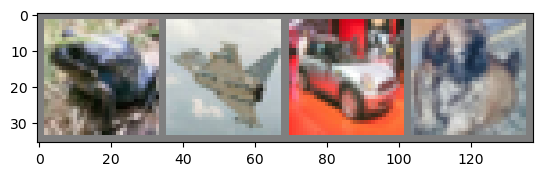

 frog plane   car   dog


In [121]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [125]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)#reshape
#         x = x.view(-1, 16 * 53 * 53) #修改后的正确的代码
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [126]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [127]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()##1

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()##2
        optimizer.step()##3

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.207
[1,  4000] loss: 1.873
[1,  6000] loss: 1.655
[1,  8000] loss: 1.572
[1, 10000] loss: 1.499
[1, 12000] loss: 1.464
[2,  2000] loss: 1.376
[2,  4000] loss: 1.372
[2,  6000] loss: 1.326
[2,  8000] loss: 1.329
[2, 10000] loss: 1.281
[2, 12000] loss: 1.292
Finished Training


版本不同引发问题---网上查找解决方案
我这只是一个学习过程。包括低级错误。
熟悉，修改用来套用自己的数据。学以致用。